Lets download the libraries we need:
We use pandas, matplolib, seaborn, sklearn and numpy

In [ ]:
#import the right libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


We will use a dataset called Iris database. This dataset is a very well know practice dataset for machine learning.
Why? because its small, clean and has a low dimensionality. 

In [ ]:
#Load data from example dataset SK learn
from sklearn.datasets import load_iris
loaddata = load_iris()

After loading the data from SK learn we can look at the description of the data

In [ ]:
print(loaddata['DESCR'])

![title](iris2.png)
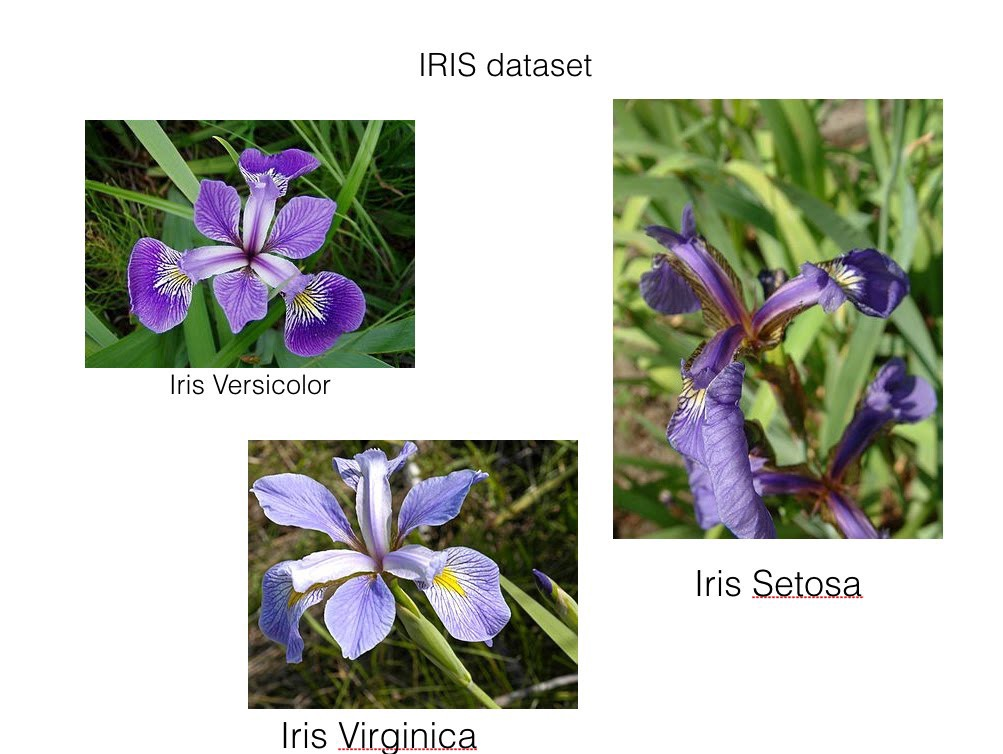

![title](iris1.jpg)
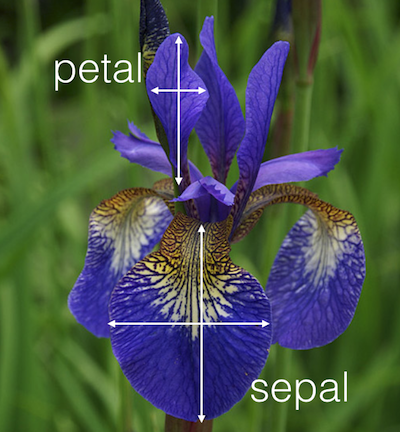

As you can see this dataset is about flowers. There are 4 features and of course one the class of flower

In [ ]:
#Dataframes are great for organizing your data.
#load all data into a dataframe
dfdata = pd.DataFrame(data=loaddata['data'],columns=loaddata['feature_names'])
dfdata['target']=loaddata['target']
dfdata['class']=dfdata['target'].map(lambda ind: loaddata['target_names'][ind])
dfdata.head(5)

If you use pandas there is a function called " describe". This function gives you a summary of all important descripte measures. 

In [ ]:
dfdata.describe()

This notebook is about K-means cluster and this an unsupervised learning approach. This dataset is actually intended to be a supervised learning project, hence why we will eliminate the target variable a.k.a the answer. 

In [ ]:
#lets make a dataframe without the answer, and one with the answer

#the answer
dfdata_y = dfdata.copy() #copy the dataframe from dfdata
y = dfdata_y.loc[:, ['target']]

#all data but without the answer
dfdata_x = dfdata.copy()
X = dfdata_x.drop(columns =[ 'target', 'class'])

Seaborn provides some really great ways of visualizing your data. My personal favorite are the pairplots. By simple adding the dataframe X to seaborn we get some very nice plots of all variables. These are great for manually finding correlations or clusters.

In [ ]:
#Time for some Exploratory Data Analysis
#Lets do some pairplots

sn.pairplot(X)

We see that there is a linear relation between: 'petal lenght' & 'petal width'. 
We also see that there is a linear relation between: 'sepal lenght' & 'petal width'.
On top of that we see some clusters in the 'sepal lenght' & 'petal width' graph and the 'sepal width' & 'petal width'.

Now lets the correlations with a correlation matrix.

In [ ]:
#lets investigate if there are meaningfull correlations
plt.figure(figsize=(8, 5))
corr = X[X.columns].corr()
sn.heatmap(corr, cmap="YlGnBu", annot = True)

We see some very high correlations (>(-)0.70) between 'petal lenght'& 'petal width', 'sepal lenght' & 'petal width', 'petal lenght' & 'sepal lenght'.



In [ ]:
#lets have a look again:
X.head()

In [ ]:
X.describe()

If you observe the table above you will notice that the ranges differ. For example:'petal width' is has a much smaller max value as 'sepal lenght'. Clustering algorithms are very sensitive to differences in scale, hence why rescaling in needed.  

In [ ]:
#look at the summary, the ranges of data are large. The K-means algorithm has problems with that.
#there is a solution however, its called scaling:
scaler = StandardScaler()
data_scaled_X = scaler.fit_transform(X)

After rescaling the data we are ready to fit a K-means cluster algorithm on the data. The most inmport parameter in a K-means algorithm is the value of K. The value of K means the amount of clusters the algorithm needs to make. The problem is we don't know how many cluster there are in the data. Therefore we need to test this, hence why we will give the algorithm 1-20 values of K and measure the performance. 

But what is the definition of performance?

In a K-means clustering algorithm this measure is called: Inertia or the sum of squared distances.
This measure sum's the distances within a cluster and that for every cluster it add's it to a total.
The lower the inertia the better but there is a catch here: A priori more clusters means less inertia.
But that doesn't mean that the algorithm can seperate the cluster better.  

To find the optimal value of K we use a method called the elbow method. This method show graphically the values for 1-20K.
We want to choose a value of K that explains the most variance.

In [ ]:
# The most important element witk K-means clustering is choosing the value of K.
#The value of K represents the amount of clusters in the data.
#In the code below we will fit ask the algorithmm to give is predictions for 1-20 clusters

SSE = [] # we start with an empty list
for cluster in range(1,20): #we create a for loop and fit the K-means 20 times with 1-20 K's
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled_X)
    SSE.append(kmeans.inertia_)

#SSE means: sum of squared distances: these are the squared distances from to points to the centroid.
#SSE is also called inertia!
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE}) # create a dataframe with the results
plt.figure(figsize=(12,6)) #create a figure in matplotlib
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia/Sum of Squared Distances')
frame

Its clear that after the third point the inertia drops slower, this is a sign that adding more clusters isn't really usefull.
The biggest clusters are already identified and addind more K's will not result in much lower values of inertia. This means that we will take 3 as the value K. We will run the algorithm again with the value of K and store the result in a variable call ss. Next we will use the prediction to graphically show the result


In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled_X)

ss = kmeans.predict(data_scaled_X)

In [ ]:
plt.scatter(data_scaled_X[:, 1],data_scaled_X[:, 2], c=ss, s=50, cmap='gist_rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.6);

Okay it seems that the algorithm produces 3 cluster, just as we asked it to do. In a normal unsupervised learning approach you would together with experts review this results and see if you initial choice with regard to the value K was right. In this case we already have the answer and it would be nice to see how well the unsupervised model actually performed. 

In [ ]:
dfdata_check = dfdata.copy()
dfdata_check = dfdata_check.drop(columns =[ 'class', 'sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)'])
df = dfdata_check.to_numpy()
df = df.ravel()

Lets show the actual datapoints and the predicted data points. 

In [ ]:
fig = plt.figure(figsize=(18,9))

ax1 = plt.subplot(321)
ax1.scatter(data_scaled_X[:, 2],data_scaled_X[:, 3], s=50, c=df, marker="o",cmap='gist_rainbow')
ax1.set_title("Actual")

ax2 = plt.subplot(322)
ax2.scatter(data_scaled_X[:, 2],data_scaled_X[:, 3], s=50, c=ss, marker="o",cmap='gist_rainbow')
ax2.set_title("Predicted")
plt.show()

As you can the algorithm did seperate the clusters nicely (forget the difference in color). There are a few points that it misclassified but in general a very decent result.